In [50]:
from nsepy import get_history as gh
import datetime as dt
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense


In [51]:
start =dt.datetime(2010,4,1)
end = dt.datetime(2020,4,1)
stk_data = gh(symbol='SBIN',start=start,end=end)

In [52]:
stk_data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2010-04-01,SBIN,EQ,2078.20,2080.0,2108.00,2075.30,2105.00,2102.60,2093.19,768145,1.607875e+14,NaN,236914,0.3084
2010-04-05,SBIN,EQ,2102.60,2115.0,2142.20,2105.00,2136.25,2138.25,2124.45,1107535,2.352905e+14,NaN,450630,0.4069
2010-04-06,SBIN,EQ,2138.25,2143.9,2147.75,2112.10,2123.10,2123.55,2128.85,1235930,2.631116e+14,NaN,587871,0.4757
2010-04-07,SBIN,EQ,2123.55,2130.3,2135.00,2096.00,2108.00,2110.90,2115.64,1300415,2.751205e+14,NaN,572452,0.4402
2010-04-08,SBIN,EQ,2110.90,2105.0,2109.80,2087.55,2091.95,2095.90,2097.15,1149701,2.411095e+14,NaN,491229,0.4273


In [53]:
stk_data.shape

(2486, 14)

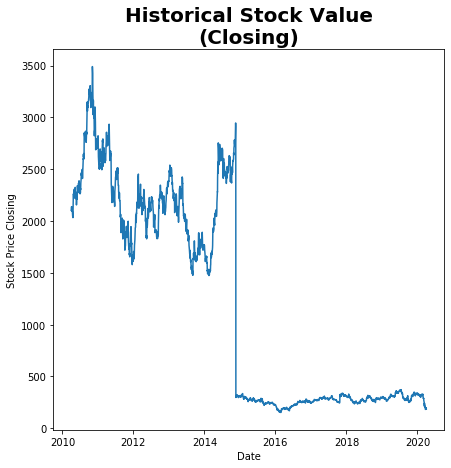

In [54]:
plt.figure(figsize=(7,7))
plt.plot(stk_data['Close'])
plt.title('Historical Stock Value\n(Closing)',fontsize=20,weight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price Closing')
plt.show()

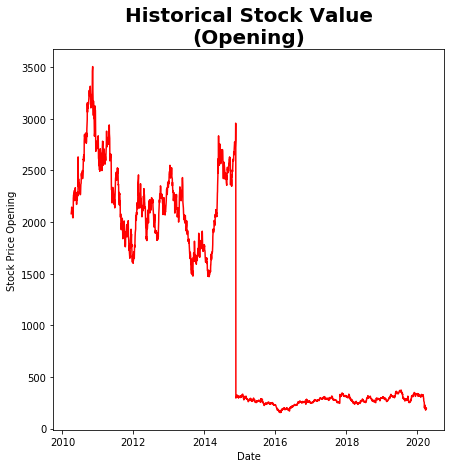

In [55]:
plt.figure(figsize=(7,7))
plt.plot(stk_data['Open'],color='red')
plt.title('Historical Stock Value\n(Opening)',fontsize=20,weight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price Opening')
plt.show()

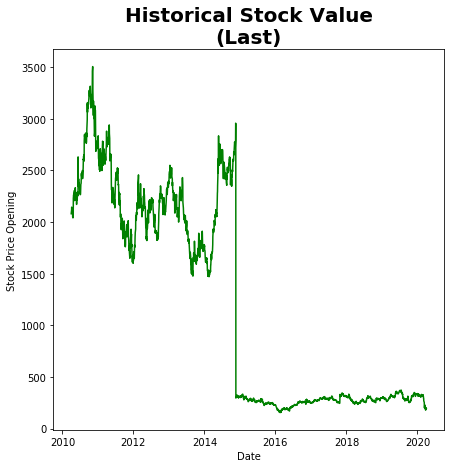

In [56]:
plt.figure(figsize=(7,7))
plt.plot(stk_data['Open'],color='green')
plt.title('Historical Stock Value\n(Last)',fontsize=20,weight='bold')
plt.xlabel('Date')
plt.ylabel('Stock Price Opening')
plt.show()

In [57]:
stk_df = stk_data[['Open','High','Low','Close']]


In [58]:
stk_df.head()

,Open,High,Low,Close
Date,,,,
2010-04-01,2080.0,2108.00,2075.30,2102.60
2010-04-05,2115.0,2142.20,2105.00,2138.25
2010-04-06,2143.9,2147.75,2112.10,2123.55
2010-04-07,2130.3,2135.00,2096.00,2110.90
2010-04-08,2105.0,2109.80,2087.55,2095.90


In [59]:
stk_data.shape

(2486, 14)

In [60]:
#All the high values are given to train_set
train_set = stk_df.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    #X_train and y_train contains all the opening prices X_train
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [61]:
regressor = Sequential()
regressor.add(LSTM(units = 200, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [62]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 15, batch_size = 32)

Epoch 1/15
1422/1422 [==============================] - 10s 7ms/step - loss: 0.0328
Epoch 2/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0093
Epoch 3/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0086
Epoch 4/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0088
Epoch 5/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0069
Epoch 6/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0068
Epoch 7/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0062
Epoch 8/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0058
Epoch 9/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0051
Epoch 10/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0055
Epoch 11/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0055
Epoch 12/15
1422/1422 [==============================] - 8s 6ms/step - loss: 0.0051


In [66]:
testdataframe= gh(symbol='SBIN',start=dt.datetime(2008,1,1),end=dt.datetime(2009,9,18))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((stk_df['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 235):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [67]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

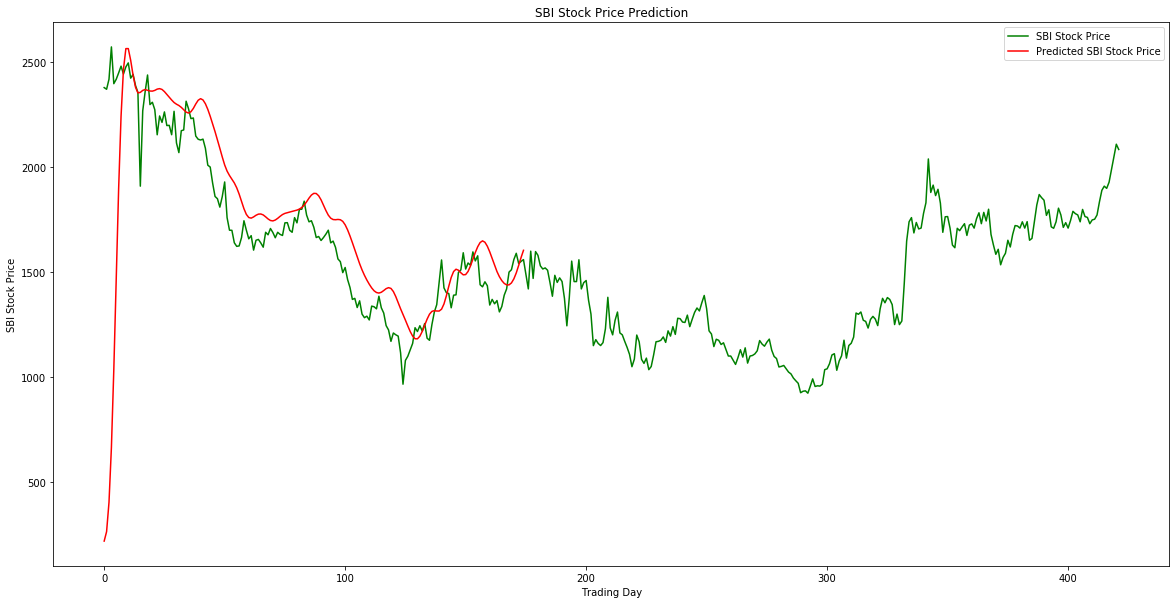

In [68]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()